# Titanic Survival Analysis

## importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Importing dataset

In [2]:
dataset = pd.read_csv('cleaned_titanic_data.csv')

In [3]:
X = dataset.drop('Survived', axis=1).values
y = dataset['Survived'].values

### Splitting into train and test sets

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-0.40071304, -0.54752051, -0.48633777, ..., -1.03466875,
        -0.20433711,  0.54106018],
       [ 0.35374917, -0.54752051, -0.48633777, ..., -1.03466875,
        -0.20433711,  0.54106018],
       [ 0.42233665, -0.54752051, -0.48633777, ...,  0.9664929 ,
        -0.20433711,  0.54106018],
       ...,
       [ 1.51973622, -0.54752051, -0.48633777, ..., -1.03466875,
        -0.20433711,  0.54106018],
       [ 0.62809907,  0.52390198,  0.70328256, ..., -1.03466875,
        -0.20433711, -1.84822326],
       [-0.40071304, -0.54752051, -0.48633777, ..., -1.03466875,
        -0.20433711, -1.84822326]])

## Analysis with Logistic Regression

### Fitting logistic regression to training set

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/home/its-k/anaconda3/envs/Learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting Test set results

In [7]:
y_pred = model.predict(X_test)

In [8]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[112,  17],
       [ 24,  62]])

In [9]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       129
           1       0.78      0.72      0.75        86

    accuracy                           0.81       215
   macro avg       0.80      0.79      0.80       215
weighted avg       0.81      0.81      0.81       215



In [10]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8093023255813954

## Analysis with DecisionTree Classification

### Fitting DecisionTree to training set

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

### Predicting Test set results

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[95, 34],
       [23, 63]])

In [14]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       129
           1       0.65      0.73      0.69        86

    accuracy                           0.73       215
   macro avg       0.73      0.73      0.73       215
weighted avg       0.74      0.73      0.74       215



In [15]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7348837209302326

## Analysis with Random Forest Classifier

### Fitting Random Forest Classifier to training set

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion='entropy',
                                    random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Predicting Test set results

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[107,  22],
       [ 19,  67]])

In [19]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       129
           1       0.75      0.78      0.77        86

    accuracy                           0.81       215
   macro avg       0.80      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



In [20]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8093023255813954

In [21]:
# Feature Importance

features = list(dataset.drop('Survived', axis=1).columns)
importances = classifier.feature_importances_
for pair in zip(features, importances):
    print("{:<20} {}".format(*pair))

Age                  0.31437354260066513
SibSp                0.051437460807166685
Parch                0.037812247027211074
Fare                 0.2652039484881173
male                 0.2039749786673056
2                    0.026036221616600293
3                    0.07071883125310988
Q                    0.006095643714507156
S                    0.024347125825316906


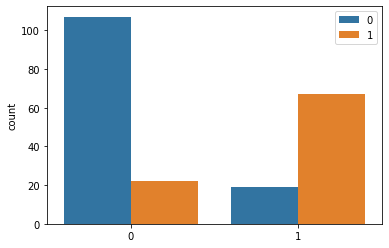

In [22]:
sns.countplot(x=y_test, hue=y_pred)


## Analysis with SVM

### Fitting SVM to training set

In [23]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

/home/its-k/anaconda3/envs/Learning/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Predicting Test set results

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[93, 36],
       [29, 57]])

In [26]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       129
           1       0.61      0.66      0.64        86

    accuracy                           0.70       215
   macro avg       0.69      0.69      0.69       215
weighted avg       0.70      0.70      0.70       215



In [27]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6976744186046512

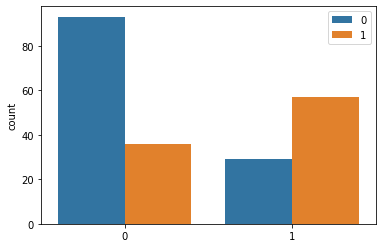

In [28]:
sns.countplot(x=y_test, hue=y_pred)